In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

(-2, 2)

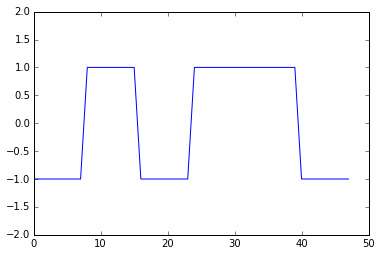

In [49]:
# Generate data: 010110
dat = np.array([-1]*8 + [1]*8 + [-1]*8 + [1] * 16 + [-1] * 8)
plt.plot(dat)
plt.ylim(-2, 2)

(-2, 2)

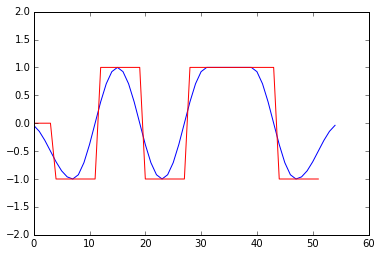

In [62]:
# Make the cosine filter
cswin = signal.windows.cosine(8)

# Filter the signal and scale
filt1 = signal.convolve(dat, cswin)
filt1 /= max(filt1)

plt.plot(filt1)
plt.plot(np.append(np.zeros(4), dat), 'r')
plt.ylim(-2, 2)

In [1]:
# Matched filter on receive side
filt2 = signal.convolve(filt1, cswin)
filt2 /= max(filt2)

plt.plot(np.append(np.zeros(4), filt1), 'b')
plt.plot(filt2, 'r')
plt.plot(np.append(np.zeros(8), dat), 'g-.')
plt.ylim(-2, 2)

NameError: name 'signal' is not defined

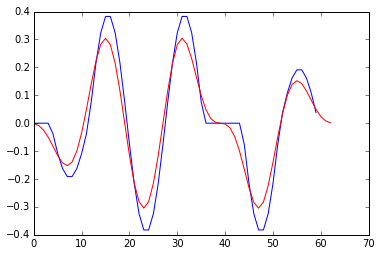

In [61]:
deriv = np.array([1, -1])
filt1_d = signal.convolve(filt1, deriv)
filt2_d = signal.convolve(filt2, deriv)

plt.plot(np.append(np.zeros(4), filt1_d), 'b')
plt.plot(filt2_d, 'r')